<a href="https://colab.research.google.com/github/vahidrqa/project1/blob/main/CompareFloodmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python opencv-python-headless

import cv2
import numpy as np
import os
from pathlib import Path

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Function to calculate the number of good matches
def calculate_good_matches(img1, img2):
    # Detect and compute SIFT features
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return len(good_matches)

# Load the source image
source_path = '/content/drive/MyDrive/Data/Source.jpg'
source_img = cv2.imread(source_path, cv2.IMREAD_GRAYSCALE)

# Directory containing images to compare
images_dir = '/content/drive/MyDrive/Data/images'
images_paths = list(Path(images_dir).glob('*'))

# Calculate similarity index for each image
similarity_indices = {}

for image_path in images_paths:
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    if img is not None:
        good_matches_count = calculate_good_matches(source_img, img)
        similarity_indices[image_path.name] = good_matches_count

# Find the image with the highest similarity index
most_similar_image = max(similarity_indices, key=similarity_indices.get)
most_similar_index = similarity_indices[most_similar_image]

# Output the similarity indices
for image_name, index in similarity_indices.items():
    print(f"Image: {image_name}, Similarity Index: {index}")

print(f"\nThe most similar image is: {most_similar_image} with an index of {most_similar_index}")



Image: hecras.jpg, Similarity Index: 156
Image: hand.jpg, Similarity Index: 151
Image: triton.jpg, Similarity Index: 167
Image: lisflood.jpg, Similarity Index: 127
Image: Ar.jpg, Similarity Index: 159

The most similar image is: triton.jpg with an index of 167


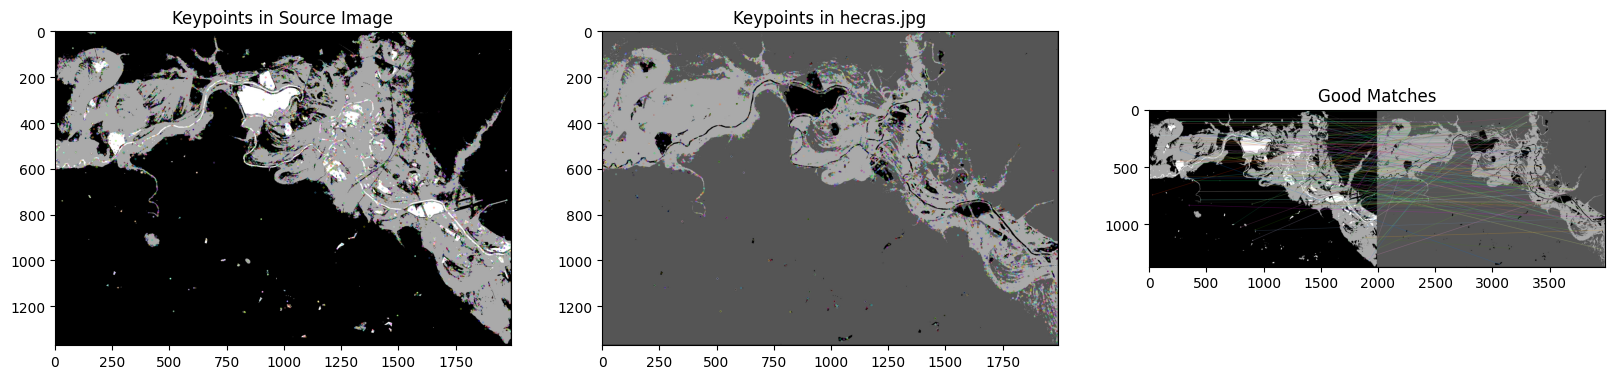

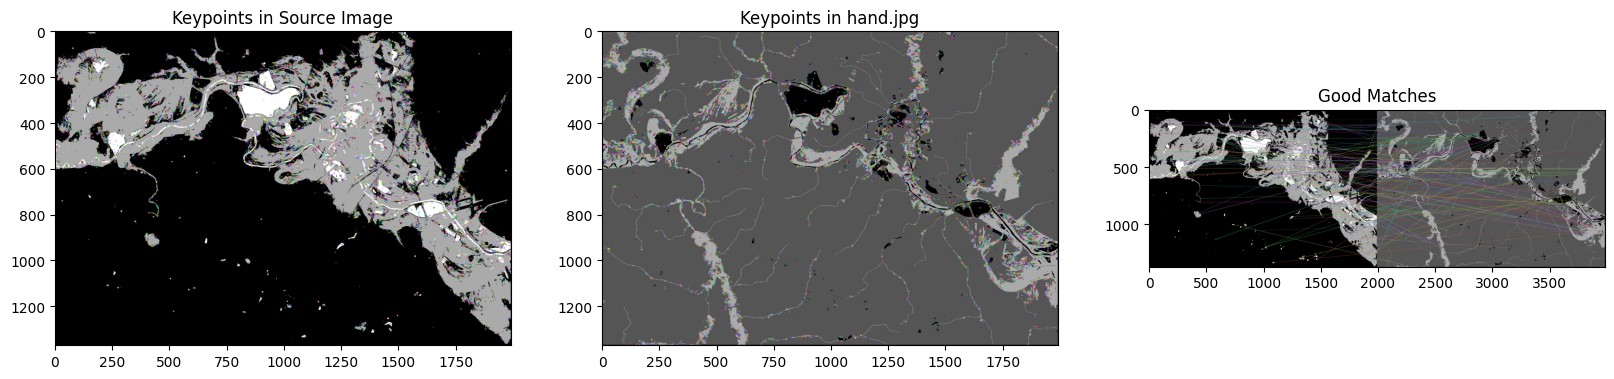

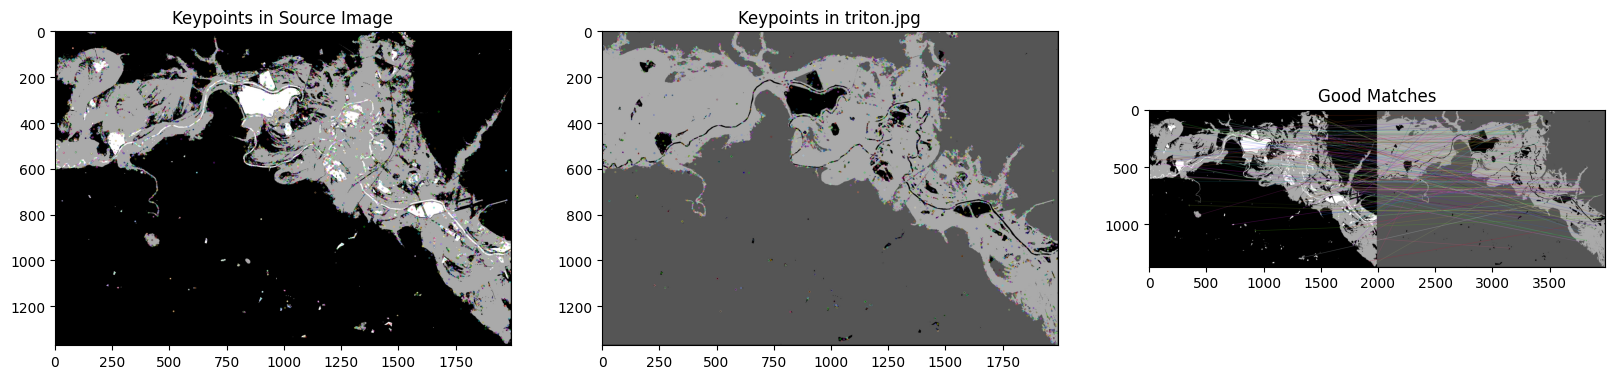

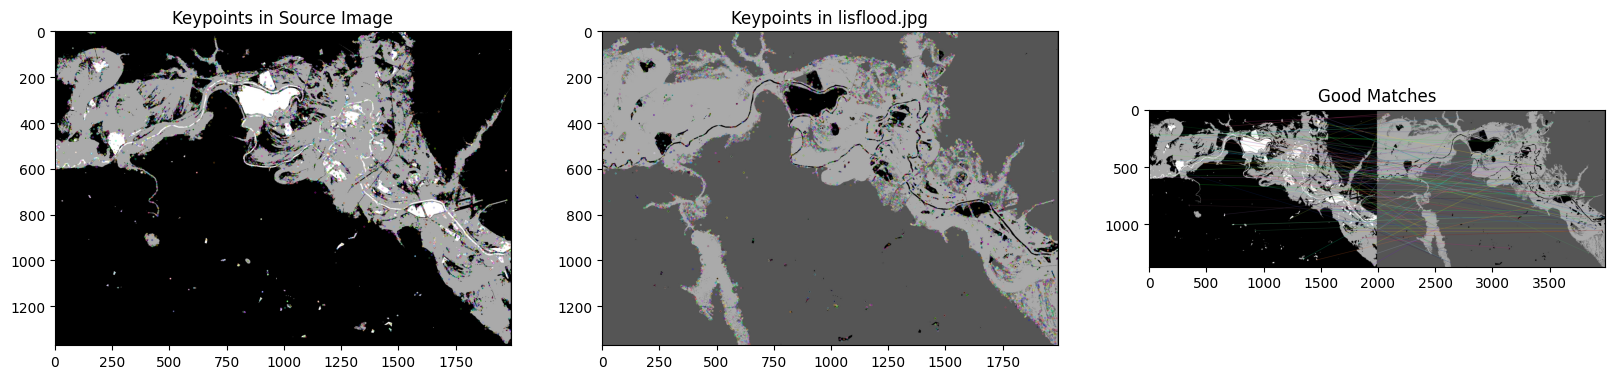

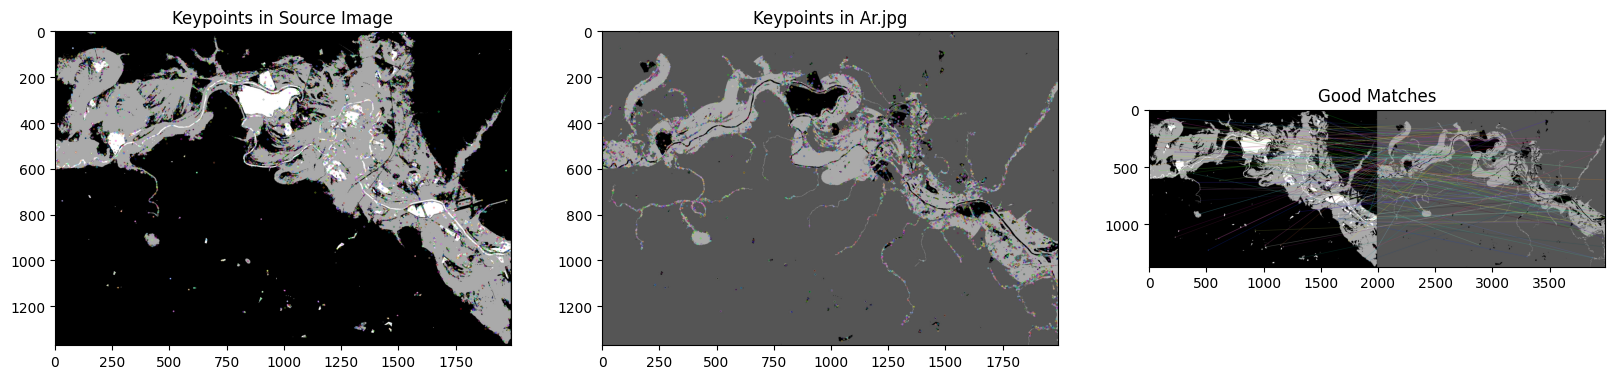

Image: hecras.jpg, Similarity Index: 162
Image: hand.jpg, Similarity Index: 152
Image: triton.jpg, Similarity Index: 162
Image: lisflood.jpg, Similarity Index: 122
Image: Ar.jpg, Similarity Index: 150

The most similar image is: hecras.jpg with an index of 162


In [2]:
!pip install opencv-python opencv-python-headless

import cv2
import numpy as np
import os
from pathlib import Path
from matplotlib import pyplot as plt

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Function to calculate the number of good matches and display keypoints
def calculate_good_matches_and_display(img1, img2, img1_name, img2_name):
    # Detect and compute SIFT features
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display images with keypoints
    img1_keypoints = cv2.drawKeypoints(img1, keypoints1, None)
    img2_keypoints = cv2.drawKeypoints(img2, keypoints2, None)

    plt.figure(figsize=(20, 10))
    plt.subplot(131), plt.imshow(img1_keypoints, cmap='gray')
    plt.title(f'Keypoints in {img1_name}')
    plt.subplot(132), plt.imshow(img2_keypoints, cmap='gray')
    plt.title(f'Keypoints in {img2_name}')
    plt.subplot(133), plt.imshow(img_matches, cmap='gray')
    plt.title('Good Matches')
    plt.show()

    return len(good_matches)

# Load the source image
source_path = '/content/drive/MyDrive/Data/Source.jpg'
source_img = cv2.imread(source_path, cv2.IMREAD_GRAYSCALE)

# Directory containing images to compare
images_dir = '/content/drive/MyDrive/Data/images'
images_paths = list(Path(images_dir).glob('*'))

# Calculate similarity index for each image
similarity_indices = {}

for image_path in images_paths:
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    if img is not None:
        good_matches_count = calculate_good_matches_and_display(source_img, img, 'Source Image', image_path.name)
        similarity_indices[image_path.name] = good_matches_count

# Find the image with the highest similarity index
most_similar_image = max(similarity_indices, key=similarity_indices.get)
most_similar_index = similarity_indices[most_similar_image]

# Output the similarity indices
for image_name, index in similarity_indices.items():
    print(f"Image: {image_name}, Similarity Index: {index}")

print(f"\nThe most similar image is: {most_similar_image} with an index of {most_similar_index}")
